# Data Analysis of Mental Health in the Tech Industry

In [53]:
# MENTAL HEALTH IN TECH INDUSTRY
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformation & algorithms
import numpy as np
from scipy.stats import chi2_contingency
import sqlite3 as sql

# Data modeling
from sklearn.preprocessing import \
    OneHotEncoder, \
    LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import \
    accuracy_score, \
    classification_report, \
    mean_squared_error


# Miscellaneous
import math
from tabulate import tabulate
from IPython.display import Image
from processes import \
    preparation, \
    transformation, \
    cleaning, \
    visualization, \
    modeling

print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.':
        print('\n', dirName, sep='')
        for filename in filenames:
            print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "G:\My Drive\Codes\.Projects\DS\Turing\2 Data Analysis\S1\Project"

.
.\215.ipynb
.\.gitignore
.\LICENSE
.\README.md
.\DataAnalysis_MentalHealth.ipynb
.\requirements.txt
.\DataAnalysis_MentalHealth - Copy.ipynb

.\processes
.\processes\preparation.py
.\processes\transformation.py
.\processes\visualization.py
.\processes\modeling.py
.\processes\cleaning.py

.\processes\__pycache__
.\processes\__pycache__\preparation.cpython-311.pyc
.\processes\__pycache__\transformation.cpython-311.pyc
.\processes\__pycache__\cleaning.cpython-311.pyc
.\processes\__pycache__\visualization.cpython-311.pyc
.\processes\__pycache__\modeling.cpython-311.pyc

.\processes\tools
.\processes\tools\modify_cls.py

.\processes\tools\__pycache__
.\processes\tools\__pycache__\modify_cls.cpython-311.pyc

.\data
.\data\mental_health.sqlite
.\data\Answers.txt
.\data\Histogram.png
.\data\mental_health.sqlite-journal
.\data\Questions.xlsx


## Familiarization with the Data

I will use the pandas library to load the data into a DataFrame and explore its shape, columns, and summary
statistics. This will help us identify any potential issues with the data quality, such as missing values, outliers, or incorrect formats. We will also visualize some key variables using matplotlib and seaborn to gain insights into the distribution and relationships of the data.


In [2]:
# EXECUTION -------------

# Display plots directly in the notebook interface
%matplotlib inline

# Connect to database
con = sql.connect('./data/mental_health.sqlite')

# Convert Answer into dataframe
Answer = pd.read_sql('SELECT * FROM Answer', con)

# First 10 observations
Answer.head(10)


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
5,33,2014,6,1
6,35,2014,7,1
7,39,2014,8,1
8,42,2014,9,1
9,23,2014,10,1


In [3]:
# Convert Question into dataframe
Question = pd.read_sql('SELECT * FROM Question', con)

# First 10 observations
Question.head(10)


,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental he...,7
7,How many employees does your company or organi...,8
8,Is your employer primarily a tech company/orga...,9
9,Does your employer provide mental health benef...,10


In [4]:
# Convert dataset into dataframe
Survey = pd.read_sql('SELECT * FROM Survey', con)

# First observations
Survey


,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


### Improving Readability
One of the steps in data analysis is to improve the readability and format of the dataset.

For the numerical data, I will assign the 'date & time' columns with `datetime` data type for further effective data
manipulation.
Furthermore, for the categorical data, I will standardize several of these columns when they can be
considered to be (at least) ordinal variables.

By improving the readability and format of the dataset, we can enhance the quality and clarity of the data analysis. We can also save time and space when performing operations on the data.


In [5]:
# Improve Dataset's Readability & Reformat Numerical & Categorical Data
Survey['Description'] = 'Mental Health Survey for ' + Survey['SurveyID'].astype(str).str[:]
Question.rename(columns={'questiontext': 'QuestionText', 'questionid': 'QuestionID'}, inplace=True)


print('# Categorical data are simplified and reformatted')
print('# Numerical values for appropriate levels are assigned.')


# Categorical data are simplified and reformatted
# Numerical values for appropriate levels are assigned.


In [6]:
Answer.update_cols()
Answer.recap()


Number of Observations: 236898; 
Number of Features: 4.
- Categorical features: AnswerText; 
- Numerical features: SurveyID, UserID, QuestionID.


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
5,33,2014,6,1
6,35,2014,7,1
7,39,2014,8,1
8,42,2014,9,1
9,23,2014,10,1


## Data Cleaning
Before analyzing the Coursera dataset, some data cleaning steps will be performed to ensure the quality and validity of the data. In this section, we will describe the data cleaning process that we applied to the data.



First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [7]:
# HANDLING ERRONEOUS VALUES

# Cleaning the dataset
if Answer.has_nan() or Answer.has_na():
    ## Observations with erroneous non-numeric data such as Title, Organization, Certificate Type, and Difficulty are
    # removed;
    Answer.dropna(subset=''.split(', '), inplace=True)
    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Answer.fillna(Answer.median(numeric_only=True, skipna=True), inplace=True)

if Question.has_nan() or Question.has_na():
    ## Observations with erroneous non-numeric data such as Title, Organization, Certificate Type, and Difficulty are
    # removed;
    Question.dropna(subset=''.split(', '), inplace=True)
    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Question.fillna(value=Question['questionid'], inplace=True)

print('\n# All datasets no longer contain unrepresentable or missing data.')


Invalid values not found.
Missing values not found.
Invalid values not found.
Missing values not found.

# All datasets no longer contain unrepresentable or missing data.


Second, any duplicate samples and features based on IDs and names will be investigated further from the dataset to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [8]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
ifDup_a = Answer.has_duplicates('index', rm=True)
ifDup_q = Question.has_duplicates('index', rm=True)


Duplicated IDs not found.
Duplicated IDs not found.


Third, any outliers in the numeric variables will be treated by observing boxplots and calculating the interquartile
range (IQR) for each variable. Any values that are more than 1.5 times the IQR above or below the first or third
quartile will be considered potential outliers which will require further careful treatment.

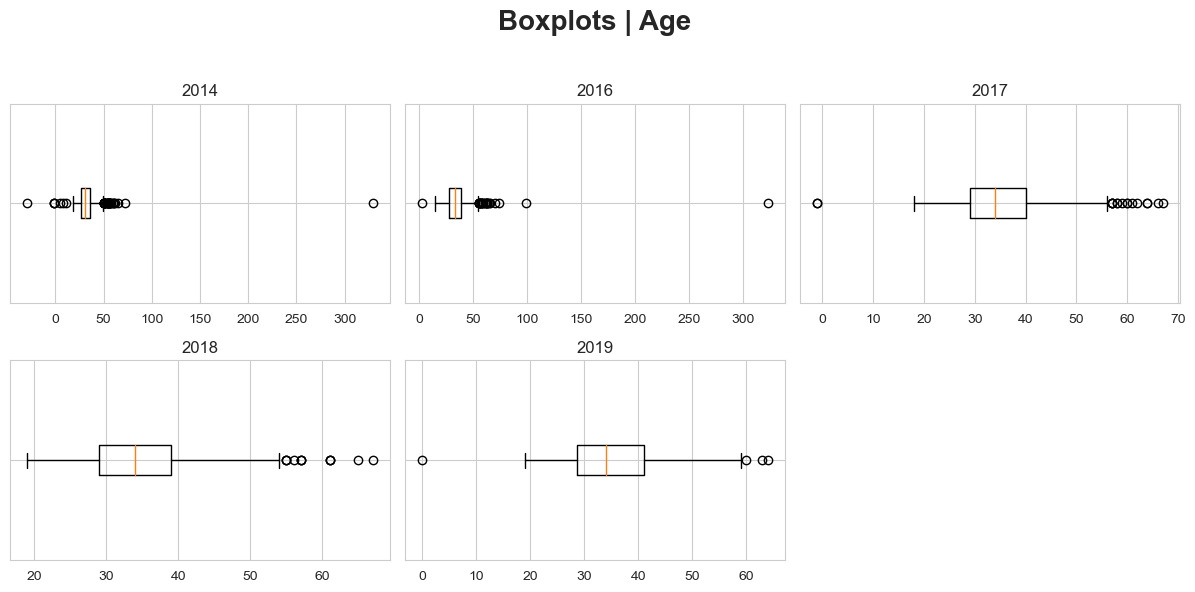

In [9]:
# TREATING OUTLIERS - AGE
con.execute(
    """
    -- Remove old Age dataset
    DROP TABLE IF EXISTS Age;
    """
)

con.execute(
    """
    -- Create Age dataset
    CREATE TABLE Age (
        UserID INTEGER,
        age INTEGER,
        SurveyID INTEGER
    )
    """
)

con.execute(
    """
    -- Insert values into Age
    INSERT INTO Age (UserID, age, SurveyID)
    SELECT UserID, CAST(AnswerText AS INTEGER), SurveyID
    FROM Answer
    WHERE QuestionID = 1
    """
)


def boxplots_age(years, xlim=None):
    n_cols = math.ceil(math.sqrt(len(years)))
    n_rows = math.ceil(len(years)/n_cols)

    # Create a figure with subplots
    figure, axes = plt.subplots(
        ncols=n_cols,
        nrows=n_rows,
        dpi=100,
        figsize=(min(16, 4*n_cols), min(12, 3*n_rows))
    )

    axes = np.array(axes).flatten()

    # Fill subplots with boxplots
    for i, year in enumerate(years):
        data = pd.read_sql(
            """
            SELECT age
            FROM Age
            WHERE SurveyID = '%s'
            """ % year,
            con
        )

        axes[i].boxplot(data, vert=False)
        axes[i].set_title(f'{year}', fontsize=12)
        axes[i].set_yticklabels([])
        if xlim is not None:
            axes[i].set_xlim(xlim)
        axes[i].grid(visible=True)

    # Remove the last empty subplot, adjust layout and title
    for i in range(len(years), len(axes)):
        figure.delaxes(axes[i])

    figure.suptitle(
        'Boxplots | Age\n',
        fontsize=20,
        fontweight='bold'
    )
    figure.subplots_adjust(hspace=0.2, wspace=0.2)
    figure.tight_layout()

    # Display the plot
    plt.show()


years = (2014, 2016, 2017, 2018, 2019)
boxplots_age(years)


In [10]:
# Inspect outliers for ages
## Loop through each column with outliers
for year in years:
    ### Compute IQR and select columns of interest
    data = Answer[(Answer['SurveyID'] == year) & (Answer['QuestionID'] == 1)].copy()
    data['AnswerText'] = pd.to_numeric(data['AnswerText'], errors='coerce')
    q1, q3 = data['AnswerText'].quantile((.25, .75))
    IQRange = q3 - q1
    cols = ['UserID','AnswerText']

    ### Select rows with values outside the IQR
    susValues = data[cols][(data['AnswerText'] < q1 - 1.5 * IQRange) | (data['AnswerText'] > q3 + 1.5 * IQRange)]

    ### Rearrange the 'outlier' rows based on data of interest
    susValues.sort_values('AnswerText', inplace=True, ascending=False)
    susValues.reset_index(drop=True, inplace=True)
    susValues.index += 1

    ### Display the outliers
    print(
        f"YEAR: {year}\n"
        f"{tabulate(susValues, tablefmt='simple')}\n"
        f"\n"
    )


YEAR: 2014
--  ----  ---
 1   365  329
 2  1183   72
 3   561   65
 4   521   62
 5   953   61
 6  1237   60
 7   298   60
 8   472   58
 9   476   57
10   644   57
11   467   57
12   632   56
13  1187   56
14   295   56
15   871   56
16   373   55
17   965   55
18   420   55
19   499   54
20   653   54
21   348   54
22   912   53
23   905   51
24  1160   51
25   528   51
26   857   51
27   896   51
28  1107   50
29   899   50
30   575   50
31   607   50
32   582   50
33    39   50
34  1091   11
35   990    8
36   735    5
37   716   -1
38  1128   -1
39   391   -1
40   144  -29
--  ----  ---


YEAR: 2016
--  ----  ---
 1  1825  323
 2  1633   99
 3  2378   74
 4  2482   70
 5  1962   66
 6  2146   65
 7  2006   63
 8  1569   63
 9  2161   63
10  2485   63
11  1852   62
12  1745   61
13  1780   61
14  1971   59
15  2133   59
16  1910   58
17  2387   57
18  1565   57
19  2428   57
20  1701   57
21  2586   56
22  1564   56
23  2327   56
24  2035   56
25  2690   56
26  1917    3
--  ----  

Any values of age that are below 15 and above 70 should be removed from the data.

In [11]:
# Remove invalid ages from Answer and store the updated answers in another table
con.execute(
    """
    -- Remove old Updated Answer dataset
    DROP TABLE IF EXISTS Answer_upd;
    """
)

con.execute(
    """
    -- Create Updated Answer dataset
    CREATE TABLE Answer_upd (
        AnswerText TEXT,
        SurveyID INTEGER,
        UserID INTEGER,
        QuestionID INTEGER
    )
    """
)

con.execute(
    """
    -- Insert values into Answer_upd
    INSERT INTO Answer_upd (AnswerText, SurveyID, UserID, QuestionID)
    SELECT *
    FROM Answer
    WHERE QuestionID <> 1 OR
    (CAST(AnswerText AS INTEGER) > 15 AND CAST(AnswerText AS INTEGER) < 70)
    """
)

# Update Answer df
Answer = pd.read_sql('SELECT * FROM Answer_upd', con)


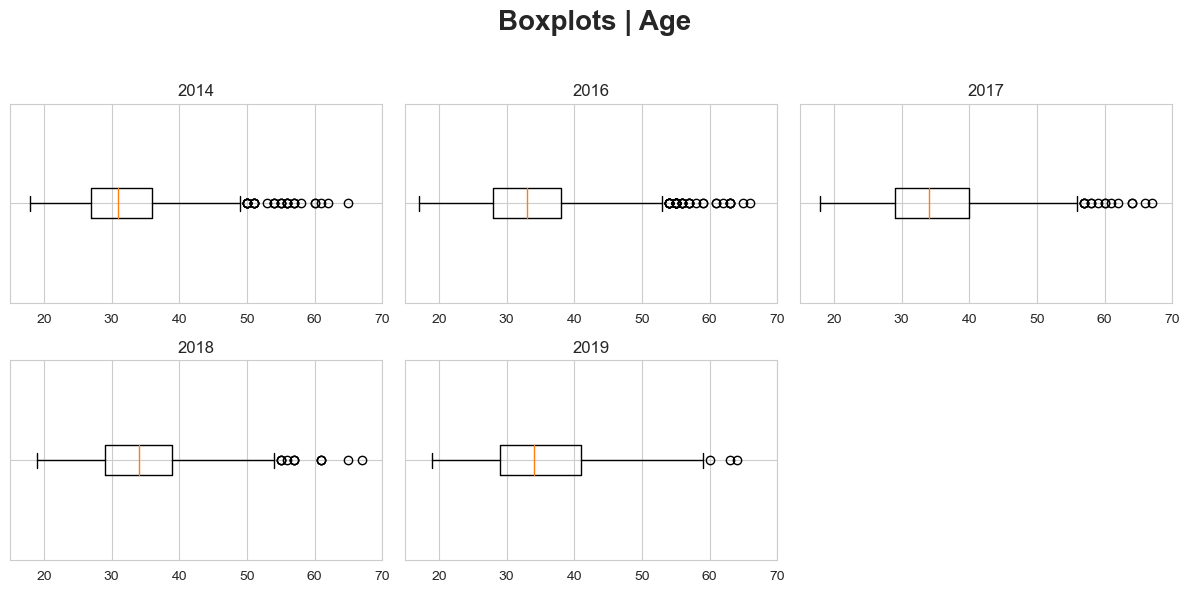

In [12]:
# Remove invalid ages from Age
con.execute(
    '''
    DELETE FROM Age
    WHERE age <= 15 OR age >= 70
    '''
)

# Show the updated boxplots after the removal
boxplots_age(years, xlim=(15, 70))


We will look into the distribution of ages more carefully using boxen plots (or letter-value plots).

A boxen plot is an enhanced version of the box plot that shows more details about the data distribution.
It uses a combination of box plots and kernel density estimation to display the distribution's shape more accurately, especially for large datasets or datasets with many outliers.

Therefore, they can reveal more information about the data's skewness, multi-modality, and tail behavior compared
to traditional box plots. As a result, they are more informative and provide a more detailed view of the data distribution, especially when the dataset has many data points or outliers. They can reveal subtle features of the data that might not be apparent in a standard box plot.

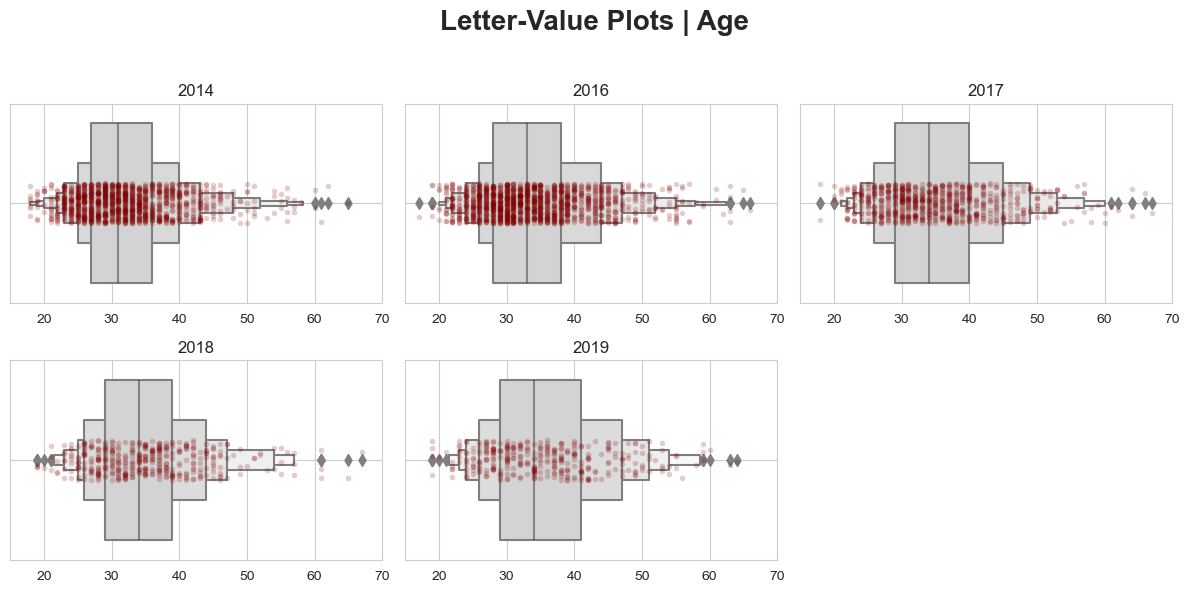

In [13]:
# Letter-value plots of quantitative data
n_cols = math.ceil(math.sqrt(len(years)))
n_rows = math.ceil(len(years)/n_cols)

# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=n_cols,
    nrows=n_rows,
    dpi=100,
    figsize=(min(16, 4*n_cols), min(12, 3*n_rows))
)

axes = np.array(axes).flatten()

# Fill subplots with boxenplots
for i, year in enumerate(years):
    data = pd.read_sql(
        """
        SELECT age
        FROM Age
        WHERE SurveyID = '%s'
        """ % year,
        con
    )

    sns.boxenplot(data['age'], ax=axes[i], color='lightgray', orient='h')
    sns.stripplot(data=data['age'], size=4, color='maroon', alpha=0.2, ax=axes[i], orient='h')
    axes[i].set_title(year, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_xlim(15, 70)
    axes[i].set_yticklabels([])
    axes[i].grid(visible=True)

# Remove the last empty subplot, adjust layout and title
for i in range(len(years), len(axes)):
    figure.delaxes(axes[i])

figure.suptitle(
    'Letter-Value Plots | Age\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


Now, we will inspect the possible values and the distribution of other answers.

In [14]:
def type_answers(id):
    answers = Answer['AnswerText'][Answer['QuestionID'] == id].unique()
    if sum(len(text) for text in answers)/len(answers) > 50:
        return '# Lengthy answers.'

    return answers

for i in Question['QuestionID'].unique()[1:]:
    print(
        f"{i}. {Question[Question['QuestionID'] == i].iloc[0, 0]}\n"
        f"---------------------------------------------------------------------------\n"
        f"{type_answers(i)}\n"
    )

2. What is your gender?
---------------------------------------------------------------------------
['Female' 'Male' 'Male-ish' 'Trans-female' 'something kinda male?'
 'queer/she/they' 'non-binary' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer'
 'Androgyne' 'Agender' 'Guy (-ish) ^_^' 'male leaning androgynous'
 'Trans woman' 'Neuter' 'Female (trans)' 'queer' 'A little about you' 'p'
 'ostensibly male, unsure what that really means' 'Bigender'
 'Female assigned at birth' 'fm' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Androgynous' 'male 9:1 female, roughly'
 '-1' 'Other' 'nb masculine' 'none of your business' 'genderqueer' 'Human'
 'Genderfluid' 'genderqueer woman' 'mtf' 'Queer' 'Fluid'
 'Male/genderqueer' 'Nonbinary' 'human' 'Unicorn' 'Male (trans, FtM)'
 'Genderflux demi-girl' 'female-bodied; no feelings about gender' 'AFAB'
 'Transgender woman' 'male' 'female' 'male/androgynous'
 'uhhhhhhhhh fem genderqueer?' 'God King of the Val

Regarding the gender data, we have decided to group the participants into 3 groups (Female, Male, and Mixed) for
several reasons, such as:
1. Data Consistency: By simplifying gender data into a limited set of categories, it ensures consistency and
standardization in the dataset.

2. Privacy and Ethics: Simplifying gender data can help in anonymizing the data and reducing the risk of reidentification.

3. Data Analysis: Aggregating gender data into a few categories allows for easier data analysis and comparison
between groups.

4. Sample Size: Combining these groups into a broader category, like "mixed," can help ensure statistical
significance when conducting analyses.

5. Overcoming Data Bias: This is a step towards addressing potential data bias and promoting inclusivity.

6. Interpretability: For communication and reporting purposes, simplifying gender data into a few categories makes
it easier for a broader audience to understand the findings and implications of the analysis.

In [15]:
# Update gender data in Updated Answer
con.execute(
    '''
    UPDATE Answer_upd
    SET AnswerText = CASE
        WHEN AnswerText LIKE 'female' THEN 'Female'
        WHEN AnswerText LIKE 'male' THEN 'Male'
        ELSE 'Mixed'
    END
    WHERE QuestionID = 2
    '''
)

# Update Answer df
Answer = pd.read_sql('SELECT * FROM Answer_upd', con)


We check to see if gender data has indeed been simplified

In [16]:
Answer['AnswerText'][Answer['QuestionID'] == 2].unique()

array(['Female', 'Male', 'Mixed'], dtype=object)

Because 'United States' and 'United States of America' represent the same country, we also combine both of these
answers under 1 label.

In [17]:
# Update residency data in Updated Answer
con.execute(
    '''
    UPDATE Answer_upd
    SET AnswerText = 'USA'
    WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
    '''
)

# Update Answer df
Answer = pd.read_sql('SELECT * FROM Answer_upd', con)


It also appears that -1 are used for participants' answers for various reasons. Some potential reasons are missing
 data, non-response or skipped questions, neutral responses, anonymization, consistency in data interpretation, or
  being a placeholder. In any case,we will retain these observations to avoid extreme loss of data and
  simplification of the data analysis.

## Exploratory Data Analysis

### Inspection into the survey questions over the years
From 2014 to 2016, although the questions used by the OSMI are similar for all demographic and personal
information in the beginning (first 12 questions), they differ in their contents in the following
mental-health-related questions.

In [18]:
# Questions that are used in all years ranging from year y to 2019
q = set(Answer[Answer['SurveyID']== 2019]['QuestionID'].unique())

for y in years[3::-1]:
    q = q.intersection(Answer[Answer['SurveyID']== y]['QuestionID'].unique())
    print(f"{y}-2019:\n"
          f"----------\n"
          f"{', '.join(map(str, q))}\n")


2018-2019:
----------
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89

2017-2019:
----------
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89

2016-2019:
----------
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56

2014-2019:
----------
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12



Only data in the Survey in 2016 have questions that contain multiple answers, thus, there are multiple
observations for some set of users and questions.

In [19]:
Answer_2016mult = Answer[Answer['SurveyID'] == 2016].groupby(['UserID', 'QuestionID']).filter(lambda x: len(x) > 1)
Answer_2016mult.head(20)


,AnswerText,SurveyID,UserID,QuestionID
230324,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1262,115
230325,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1262,115
230327,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1264,115
230328,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1264,115
230329,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1265,115
230330,Stress Response Syndromes,2016,1265,115
230331,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1266,115
230332,Stress Response Syndromes,2016,1266,115
230333,Substance Use Disorder,2016,1266,115
230335,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1268,115


Those questions that have multiple answers are:

In [20]:
print(tabulate(Question[Question['QuestionID'].isin(Answer_2016mult['QuestionID'].unique())].set_index
               ('QuestionID')))

---  ---------------------------------------------------------
115  If yes, what condition(s) have you been diagnosed with?
116  If maybe, what condition(s) do you believe you have?
117  Which of the following best describes your work position?
---  ---------------------------------------------------------


In [21]:
Data = {
    y: Answer[Answer['SurveyID'] == y].pivot(index='UserID', columns='QuestionID', values='AnswerText')
    for y in years
    if y != 2016
}

Data[2016] = Answer[(Answer['SurveyID'] == 2016) & ~Answer['QuestionID'].isin([115, 116, 117])]\
    .pivot(index='UserID', columns='QuestionID', values='AnswerText')

for year in years:
    Data[year][0] = year

Data[2016]


QuestionID,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,118,0
UserID,,,,,,,,,,,,,,,,,,,,,
1261,39,Male,United Kingdom,-1,0,No,0,26-100,1,Not eligible for coverage / NA,...,-1,Some of them,None of them,Some of my previous employers,I don't know,None of them,Maybe,"No, I don't think they would",Sometimes,2016
1262,29,Male,USA,Illinois,0,Yes,1,6-25,1,No,...,-1,None of them,None of them,"No, at none of my previous employers",Some did,None of them,"No, I don't think it would","No, I don't think they would",Never,2016
1263,38,Male,United Kingdom,-1,0,No,1,6-25,1,No,...,-1,I don't know,Some of them,Some of my previous employers,I don't know,Some of them,Maybe,Maybe,Always,2016
1264,43,Male,United Kingdom,-1,1,No,1,-1,-1,-1,...,I'm not sure,Some of them,Some of them,Some of my previous employers,I don't know,Some of them,"Yes, I think it would",Maybe,Sometimes,2016
1265,43,Female,USA,Illinois,0,Yes,1,6-25,0,Yes,...,-1,Some of them,Some of them,"No, at none of my previous employers",Some did,Some of them,"Yes, I think it would",Maybe,Sometimes,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,34,Female,USA,New York,1,Yes,1,-1,-1,-1,...,Not applicable to me,I don't know,None of them,Some of my previous employers,Some did,None of them,Maybe,Maybe,Sometimes,2016
2690,56,Male,USA,California,1,Yes,0,-1,-1,-1,...,No,-1,-1,-1,-1,-1,"No, it has not","Yes, I think they would",Sometimes,2016
2691,52,Male,USA,Georgia,0,Yes,1,100-500,1,Yes,...,-1,"Yes, all of them",Some of them,Some of my previous employers,None did,Some of them,"Yes, it has","No, I don't think they would",Sometimes,2016


### Gender distribution

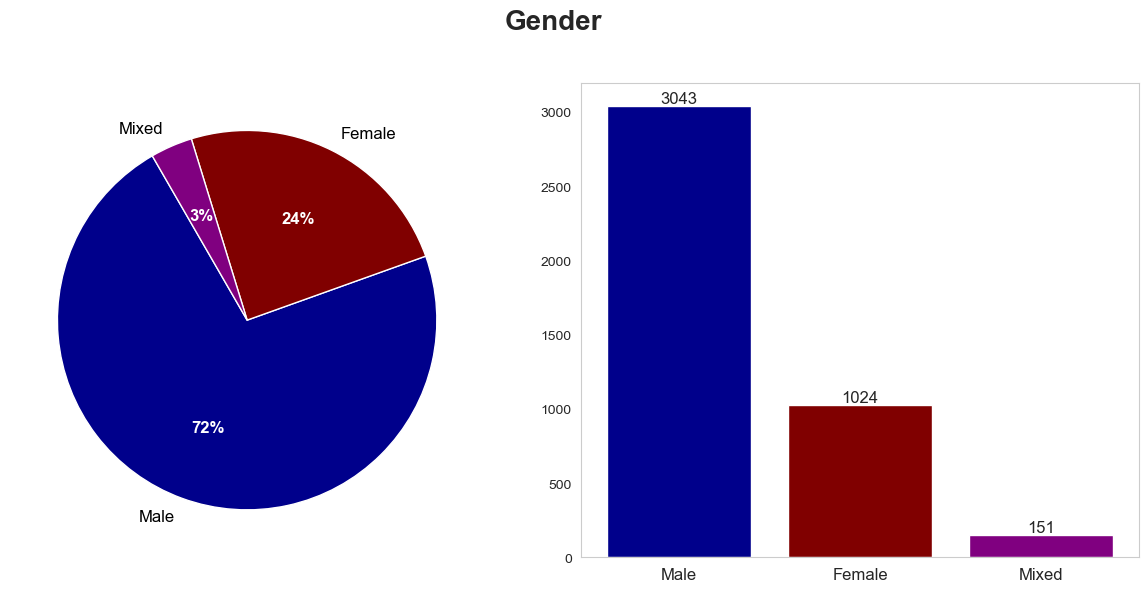

In [107]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(min(12, 4*n_cols), min(12, 3*n_rows))
)

axes = np.array(axes).flatten()

# Count the occurrences of each value
counts = pd.read_sql(
    '''
    SELECT AnswerText
    FROM Answer_upd
    WHERE QuestionID = 2
    ''',
    con
)['AnswerText'].value_counts()

colors = ['darkblue', 'maroon', 'purple']

wedges, texts, autotexts = axes[0].pie(counts, labels=counts.index, autopct='%1i%%', startangle=120, colors=colors)
axes[0].set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Customize the text labels
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    text.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

bars = axes[1].bar(counts.index, counts, color=colors)
axes[1].grid(False)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=12)

# Change font size of x-axis ticks
axes[1].tick_params(axis='x', which='major', labelsize=12)

figure.suptitle(
    'Gender\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


### Residency distribution
#### By countries:

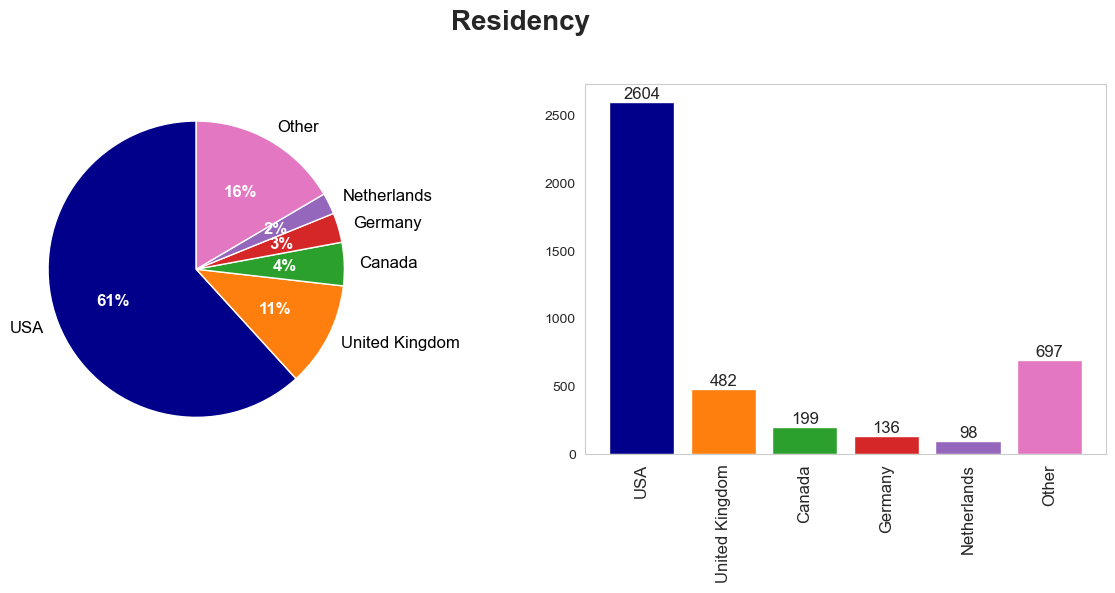

In [106]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(min(16, 4*n_cols), min(16, 3*n_rows))
)

axes = np.array(axes).flatten()

# Count the occurrences of each value
counts = pd.read_sql(
    '''
    SELECT AnswerText
    FROM Answer_upd
    WHERE QuestionID = 3 AND AnswerText <> '-1'
    ''',
    con
)['AnswerText'].value_counts()

colors = ['darkblue', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2']

# Get the top 5 common values and their counts
top_5_values = counts.head(5)
other_count = counts.sum() - top_5_values.sum()

# Create a list of labels for the pie chart
labels = list(top_5_values.index) + ['Other']

# Create a list of values for the pie chart
values = list(top_5_values.values) + [other_count]

# Create the pie chart
wedges, texts, autotexts = axes[0].pie(values, labels=labels, autopct='%1i%%', startangle=90, colors=colors)
axes[0].set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Customize the text labels
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    text.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

bars = axes[1].bar(labels, values, color=colors)
axes[1].grid(False)
axes[1].set_xticklabels(labels, rotation=90)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=12)

# Change font size of x-axis ticks
axes[1].tick_params(axis='x', which='major', labelsize=12)

figure.suptitle(
    'Residency\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


#### Within the United States:

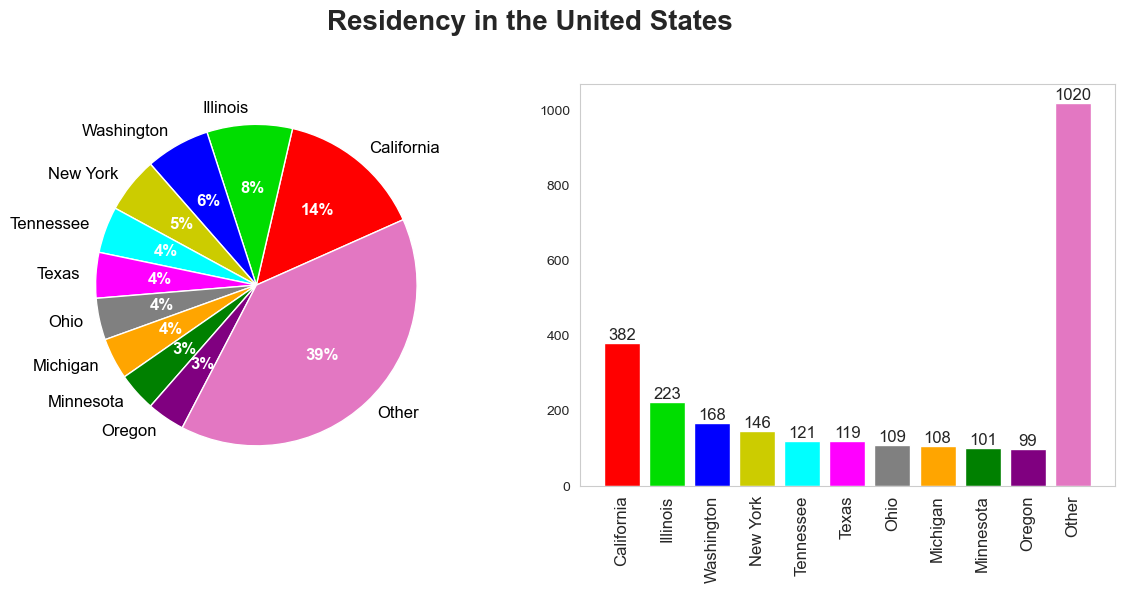

In [67]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(min(16, 4*n_cols), min(16, 3*n_rows))
)

axes = np.array(axes).flatten()

# Count the occurrences of each value
counts = pd.read_sql(
    '''
    SELECT AnswerText
    FROM Answer_upd
    WHERE QuestionID = 4 AND AnswerText <> '-1'
    ''',
    con
)['AnswerText'].value_counts()

colors = [
    '#FF0000',   # Red
    '#00DD00',   # Green
    '#0000FF',   # Blue
    '#CCCC00',   # Yellow
    '#00FFFF',   # Cyan
    '#FF00FF',   # Magenta
    '#808080',   # Gray
    '#FFA500',   # Orange
    '#008000',   # Dark Green
    '#800080',   # Purple
    '#E377C2'    # Pink
]

# Get the top 10 common states and their counts
top_10_values = counts.head(10)
other_count = counts.sum() - top_10_values.sum()

# Create a list of labels for the pie chart
labels = list(top_10_values.index) + ['Other']

# Create a list of values for the pie chart
values = list(top_10_values.values) + [other_count]

# Create the pie chart
wedges, texts, autotexts = axes[0].pie(values, labels=labels, autopct='%1i%%', startangle=24, colors=colors)
axes[0].set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Customize the text labels
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    text.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

bars = axes[1].bar(labels, values, color=colors)
axes[1].grid(False)
axes[1].set_xticklabels(labels, rotation=90)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=12)

# Change font size of x-axis ticks
axes[1].tick_params(axis='x', which='major', labelsize=12)

figure.suptitle(
    'Residency in the United States\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


### Self-Employment status

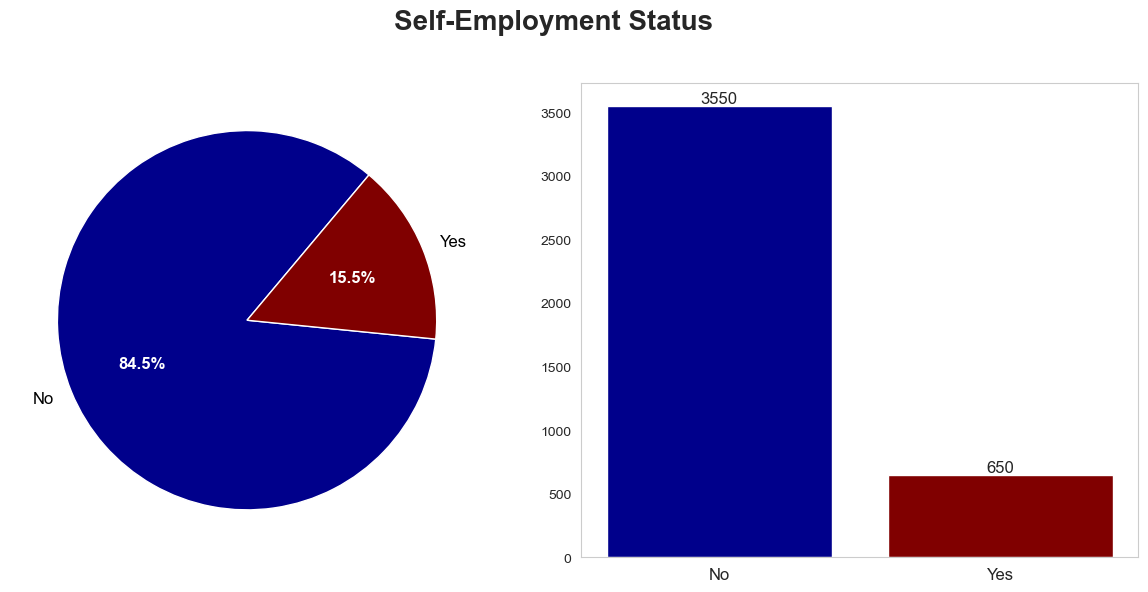

In [64]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(min(12, 4*n_cols), min(12, 3*n_rows))
)

axes = np.array(axes).flatten()

# Count the occurrences of each value
counts = pd.read_sql(
    '''
    SELECT AnswerText
    FROM Answer_upd
    WHERE QuestionID = 5 AND AnswerText <> -1
    ''',
    con
)['AnswerText'].value_counts()

labels = ['No', 'Yes']

colors = ['darkblue', 'maroon']

wedges, texts, autotexts = axes[0].pie(counts, labels=labels, autopct='%1.1f%%', startangle=50, colors=colors)
axes[0].set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Customize the text labels
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    text.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

bars = axes[1].bar(labels, counts, color=colors)
axes[1].grid(False)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=12)

# Change font size of x-axis ticks
axes[1].tick_params(axis='x', which='major', labelsize=12)

figure.suptitle(
    'Self-Employment Status\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


### History of mental illness

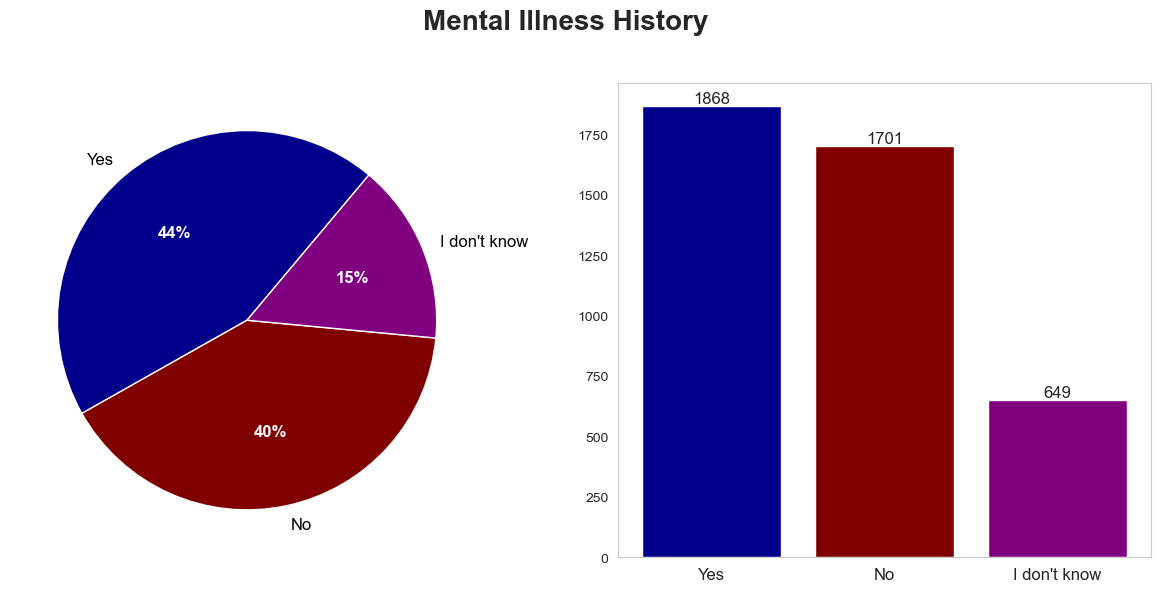

In [108]:
# Create a figure with subplots
figure, axes = plt.subplots(
    ncols=2,
    nrows=1,
    dpi=100,
    figsize=(min(12, 4*n_cols), min(12, 3*n_rows))
)

axes = np.array(axes).flatten()

# Count the occurrences of each value
counts = pd.read_sql(
    '''
    SELECT AnswerText
    FROM Answer_upd
    WHERE QuestionID = 6
    ''',
    con
)['AnswerText'].value_counts()

labels = counts.index

colors = ['darkblue', 'maroon', 'purple']

wedges, texts, autotexts = axes[0].pie(counts, labels=labels, autopct='%1i%%', startangle=50, colors=colors)
axes[0].set_aspect('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Customize the text labels
for text, autotext in zip(texts, autotexts):
    text.set_fontsize(12)
    text.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

bars = axes[1].bar(labels, counts, color=colors)
axes[1].grid(False)

# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=12)

# Change font size of x-axis ticks
axes[1].tick_params(axis='x', which='major', labelsize=12)

figure.suptitle(
    'Mental Illness History\n',
    fontsize=20,
    fontweight='bold'
)
figure.subplots_adjust(hspace=0.2, wspace=0.2)
figure.tight_layout()

# Display the plot
plt.show()


###

### More advanced EDA
We will now inspect the relationships between the demographic and the general information of the participants
based on the set of the first 12 same questions of the survey in all those 5 years.

In [75]:
Data_personalInfo = pd.concat([Data[year][range(0, 13)] for year in years])
Data_personalInfo.head(10)

QuestionID,0,1,2,3,4,5,6,7,8,9,10,11,12
UserID,,,,,,,,,,,,,
1,2014,37,Female,USA,Illinois,-1,No,1,6-25,1,Yes,Yes,No
2,2014,44,Male,USA,Indiana,-1,No,0,More than 1000,0,Don't know,Don't know,No
3,2014,32,Male,Canada,-1,-1,No,0,6-25,1,No,Don't know,Yes
4,2014,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,No,Maybe
5,2014,31,Male,USA,Texas,-1,No,0,100-500,1,Yes,Don't know,Yes
6,2014,33,Male,USA,Tennessee,-1,Yes,0,6-25,1,Yes,Don't know,No
7,2014,35,Female,USA,Michigan,-1,Yes,1,1-5,1,No,No,No
8,2014,39,Male,Canada,-1,-1,No,0,1-5,1,No,Yes,No
9,2014,42,Female,USA,Illinois,-1,Yes,1,100-500,1,Yes,No,No


In [74]:
Data_PIUS = Data_personalInfo[Data_personalInfo[3] == 'USA']
counts = Data_PIUS.groupby(by=4)[5].value_counts()


4              5
-1             0     9
               1     3
Alabama        0    16
               1     3
Alaska         0     4
                    ..
West Virginia  0     2
               1     1
Wisconsin      0    34
               1     9
Wyoming        0     3
Name: 5, Length: 98, dtype: int64

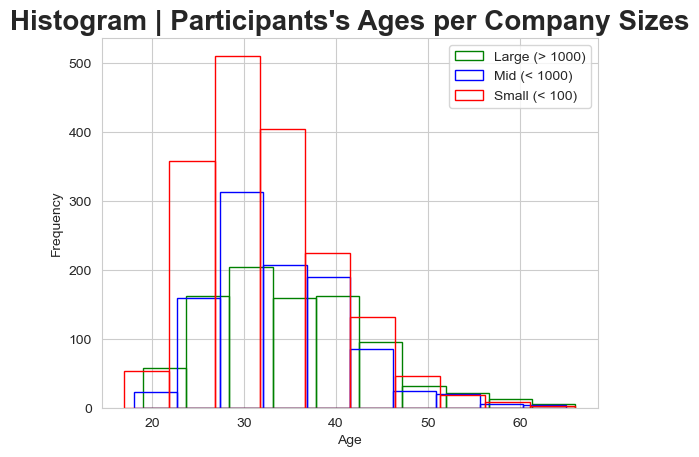

In [104]:
# Group by company size
mapping = {
    '1-5': 'Small (< 100)', '6-25': 'Small (< 100)', '26-100': 'Small (< 100)',
    '100-500': 'Mid (< 1000)', '500-1000': 'Mid (< 1000)',
    'More than 1000': 'Large (> 1000)'
}


Data_personalInfoMod = Data_personalInfo[Data_personalInfo[8] != '-1']
companySizes = Data_personalInfoMod[8].map(mapping)
DATA_PIgrouped = Data_personalInfoMod.groupby(by=companySizes)

# Create a histogram for each group
fig, ax = plt.subplots()
colors = {'Small (< 100)': 'red', 'Mid (< 1000)': 'blue',
    'Large (> 1000)': 'green'}
for group, group_data in DATA_PIgrouped:
    ax.hist(group_data[1].dropna().astype(int), bins=10, label=group,
            alpha=1, fill=False, edgecolor=colors[group])

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title(
    "Histogram | Participants's Ages per Company Sizes",
    fontsize=20,
    fontweight='bold'
)
ax.legend()

# Show the plot
plt.show()

## Data Analysis - Predicting Current Mental Health Status
From the data being provided, because the participants in each year are all different, this cannot be formulated
as a panel study. Therefore, I have decided to design a different approach to accommodate the given data, by
presenting the survey results as a separate pre-post samples design with random sampling.

This design has multiple groups in which these groups come from a nonequivalent group, with measurements being
conducted at different intervals of time. Essentially, for each of the 5 years, we can consider each survey as
measuring 5 different groups.

In our data analysis, I will only choose the survey results of latter 4 years, due to much greater overlap of
survey questions being asked. This allows greater scope of data analysis and produces more in-depth inferences.


In [29]:
Data_model = pd.concat([Data[year][[33, 32, 1, 2, 6, 10, 15, 16, 54, 55, 56, 23, 25, 26, 0]]
                        for year in years[1:]])

Data_model.columns = Data_model.columns.astype(str)

Data_model.update_cols()
Data_model.recap()

Number of Observations: 2958; 
Number of Features: 15.
- Categorical features: 33, 32, 1, 2, 6, 10, 15, 16, 54, 55, 56, 23, 25, 26; 
- Numerical features: 0.


QuestionID,33,32,1,2,6,10,15,16,54,55,56,23,25,26,0
UserID,,,,,,,,,,,,,,,
1261,No,Yes,39,Male,No,Not eligible for coverage / NA,No,No,-1,-1,No,"No, none did",I don't know,None did,2016
1262,Yes,Yes,29,Male,Yes,No,Yes,Yes,-1,-1,No,"Yes, they all did",None did,Some did,2016
1263,No,Maybe,38,Male,No,No,No,No,-1,-1,Maybe/Not sure,"No, none did",None did,Some did,2016
1264,Yes,Yes,43,Male,No,-1,-1,-1,Yes,1-25%,No,Some did,None did,None did,2016
1265,Yes,Yes,43,Female,Yes,Yes,No,No,-1,-1,"Yes, I experienced",I don't know,Some did,None did,2016
1266,Yes,No,42,Male,No,Yes,No,Yes,-1,-1,"Yes, I experienced","No, none did",None did,None did,2016
1267,No,No,30,Male,No,I don't know,No,No,-1,-1,No,Some did,None did,Some did,2016
1268,Yes,Yes,37,Female,Yes,Yes,No,Yes,-1,-1,"Yes, I observed",Some did,Some did,Some did,2016
1269,Yes,Yes,44,Female,Yes,I don't know,No,No,-1,-1,"Yes, I observed",I don't know,Some did,None did,2016


In [30]:
# INSPECT RELATIONSHIPS BETWEEN VARIABLES

# Turn current text but quantitative variables into numeric
## Dependent variable: Do you currently have a mental health disorder?
Data_model['33'].replace({
    'Yes': 2,
    'No': 0,
    'Maybe': 1,
    "Don't Know": -1,
    '-1': -1,
    'Possibly': 1
}, inplace=True)

## Have you had a mental health disorder in the past?
Data_model['32'].replace({
    'Yes': 2,
    'No': 0,
    'Maybe': 1,
    "Don't Know": -1,
    '-1': -1,
    'Possibly': 1
}, inplace=True)

## Age
Data_model = Data_model[~Data_model['1'].isna()]
Data_model['1'] = pd.to_numeric(Data_model['1'], errors='coerce')

## Do you believe your productivity is ever affected by a mental health issue?
Data_model['54'].replace({
    'Yes': 2,
    'No': 0,
    'Not applicable to me': 0,
    "Unsure": 1,
    '-1': -1
}, inplace=True)

## If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a
# mental health issue?
Data_model['55'].replace({
    '-1': 0, '1-25%': 1, '26-50%': 2, '51-75%': 3, '76-100%': 4
}, inplace=True)

## Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your
# current or previous workplace?
Data_model['56'].replace({
    "I've always been self-employed": 0,
    'No': 0,
    'Maybe/Not sure': 1,
    'Yes, I experienced': 2,
    'Yes, I observed': 2,
    '-1': -1
}, inplace=True)


# Turn remaining categorical variables into numeric labels
encoder_lb = LabelEncoder()

# Fit and transform the data
Data_model_lb = pd.DataFrame()

for col in Data_model.columns:
    if Data_model[col].dtype == 'object':
        Data_model_lb[col] = encoder_lb.fit_transform(Data_model[col])
    else:
        Data_model_lb[col] = Data_model[col]

Data_model_lb.update_cols()
Data_model_lb.recap()


Number of Observations: 2949; 
Number of Features: 15.
- Categorical features: ; 
- Numerical features: 33, 32, 1, 2, 6, 10, 15, 16, 54, 55, 56, 23, 25, 26, 0.


,33,32,1,2,6,10,15,16,54,55,56,23,25,26,0
UserID,,,,,,,,,,,,,,,
1261,0,2,39,1,1,3,2,2,-1,0,0,2,1,1,2016
1262,2,2,29,1,2,2,3,3,-1,0,0,4,2,2,2016
1263,0,1,38,1,1,2,2,2,-1,0,1,2,2,2,2016
1264,2,2,43,1,1,0,0,0,2,1,0,3,2,1,2016
1265,2,2,43,0,2,4,2,2,-1,0,2,1,3,1,2016
1266,2,0,42,1,1,4,2,3,-1,0,2,2,2,1,2016
1267,0,0,30,1,1,1,2,2,-1,0,0,3,2,2,2016
1268,2,2,37,0,2,4,2,3,-1,0,2,3,3,2,2016
1269,2,2,44,0,2,1,2,2,-1,0,2,1,3,1,2016


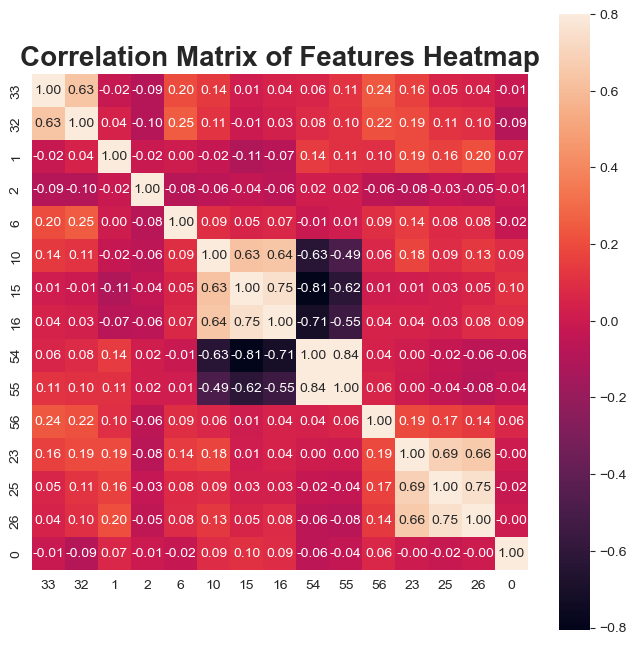

In [31]:
Data_model_lb.corr_heatmap()


In [32]:
# Data preparation
encoder_oh = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder_oh.fit_transform(Data_model.drop(columns='33'))

# Convert the encoded data back to a DataFrame if needed
Data_model_oh = pd.DataFrame(
    encoded_data.toarray(),
    columns=encoder_oh.get_feature_names_out(Data_model.columns[1:])
)

Data_model_oh.update_cols()
Data_model_oh.recap()

Number of Observations: 2949; 
Number of Features: 105.
- Categorical features: ; 
- Numerical features: 32_-1, 32_0, 32_1, 32_2, 1_17, 1_18, 1_19, 1_20, 1_21, 1_22, 1_23, 1_24, 1_25, 1_26, 1_27, 1_28, 1_29, 1_30, 1_31, 1_32, 1_33, 1_34, 1_35, 1_36, 1_37, 1_38, 1_39, 1_40, 1_41, 1_42, 1_43, 1_44, 1_45, 1_46, 1_47, 1_48, 1_49, 1_50, 1_51, 1_52, 1_53, 1_54, 1_55, 1_56, 1_57, 1_58, 1_59, 1_60, 1_61, 1_62, 1_63, 1_64, 1_65, 1_66, 1_67, 2_Female, 2_Male, 2_Mixed, 6_I don't know, 6_No, 6_Yes, 10_-1, 10_I don't know, 10_No, 10_Not eligible for coverage / NA, 10_Yes, 15_-1, 15_I don't know, 15_No, 15_Yes, 16_-1, 16_I don't know, 16_No, 16_Yes, 54_-1, 54_0, 54_1, 54_2, 55_0, 55_1, 55_2, 55_3, 55_4, 56_-1, 56_0, 56_1, 56_2, 23_-1, 23_I don't know, 23_No, none did, 23_Some did, 23_Yes, they all did, 25_-1, 25_I don't know, 25_None did, 25_Some did, 25_Yes, they all did, 26_-1, 26_None did, 26_Some did, 26_Yes, they all did, 0_2016, 0_2017, 0_2018, 0_2019.


,32_-1,32_0,32_1,32_2,1_17,1_18,1_19,1_20,1_21,1_22,...,25_Some did,"25_Yes, they all did",26_-1,26_None did,26_Some did,"26_Yes, they all did",0_2016,0_2017,0_2018,0_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Time-naive classification models
In this section, I will focus on the analysis of the survey data without considering the temporal dimension. This decision is justified by the assumption that the survey respondents are not the same individuals in different years, and that the time variable does not affect the classification model in a meaningful or consistent way. The classification model is a statistical technique that aims to assign each survey respondent to one of several predefined categories based on their answers to a set of questions. By excluding the survey periods as a predictor variable in the model, I aim to reduce the complexity and increase the generalizability of the model.

In [33]:
# Create training and testing sets
y_train = Data_model['33'][Data_model['0'] != 2019]
X_train = Data_model_oh.drop(columns=['0_2016', '0_2017', '0_2018', '0_2019'])[~Data_model_oh['0_2019'].astype(bool)]

y_test = Data_model['33'][Data_model['0'] == 2019]
X_test = Data_model_oh.drop(columns=['0_2016', '0_2017', '0_2018', '0_2019'])[Data_model_oh['0_2019'].astype(bool)]


#### K-nearest neighbors

In [34]:
# Test different values of K to find the most suitable value for this dataset
K_s = range(1, 201)
rmse_val = [] #to store rmse values for different K

for K in K_s:
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    if K <= 5 or 45 < K <= 50:
        print('RMSE value for k =' , K , 'is:', error)
    elif K == 6:
        print('...')

RMSE value for k = 1 is: 1.0211439872687116
RMSE value for k = 2 is: 1.0741723110591492
RMSE value for k = 3 is: 1.0113318064769954
RMSE value for k = 4 is: 1.0
RMSE value for k = 5 is: 0.9798540504146319
...
RMSE value for k = 46 is: 0.9336995618478525
RMSE value for k = 47 is: 0.9533267586887031
RMSE value for k = 48 is: 0.9382653571042044
RMSE value for k = 49 is: 0.9548198320525771
RMSE value for k = 50 is: 0.9740215340114143


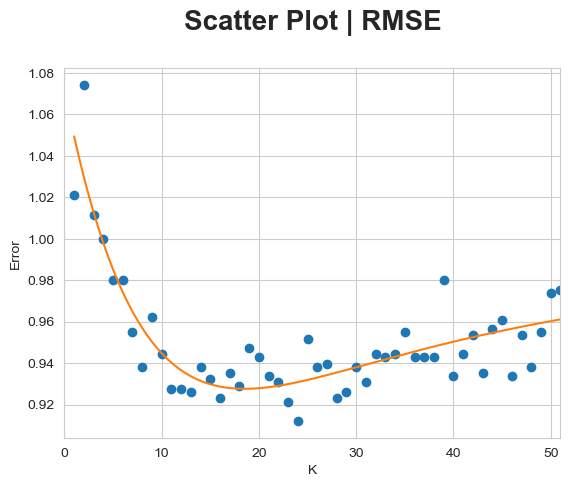

In [35]:
# Plotting the rmse values against k values
curve = pd.DataFrame({'K': K_s, 'RMSE': rmse_val}) # elbow curve

# Create the scatter plot with a curve of best fit
## Calculate polynomial
z = np.polyfit(K_s, rmse_val, 10)
f = np.poly1d(z)

## Calculate new x's and y's
x_new = np.linspace(1, 200, 1000)
y_new = f(x_new)

plt.plot(K_s, rmse_val,'o', x_new, y_new)
plt.xlim([0, 51])

# Add titles and labels
plt.title(
    'Scatter Plot | RMSE\n',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('K')
plt.ylabel('Error')

# Display the plot
plt.show()

In [36]:
k = 24

# Create and train k-nearest neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%.")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 60.97%.
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        26
           0       0.58      0.69      0.63       103
           1       0.49      0.27      0.34        75
           2       0.65      0.84      0.73       147

    accuracy                           0.61       351
   macro avg       0.43      0.45      0.43       351
weighted avg       0.55      0.61      0.57       351



#### Random forest

In [37]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%.")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 60.97%.
Classification Report:
              precision    recall  f1-score   support

          -1       0.18      0.08      0.11        26
           0       0.63      0.67      0.65       103
           1       0.40      0.41      0.41        75
           2       0.74      0.76      0.75       147

    accuracy                           0.61       351
   macro avg       0.49      0.48      0.48       351
weighted avg       0.59      0.61      0.60       351



### Time-dependent classfication models
In contrast to the previous section, where I ignored the temporal dimension of the surveys, in this section I will
 explore the possibility of using a time-dependent classification model. The time-dependent
 The model incorporates the time variable as a feature in the classification process, and assigns
 different weights to data points depending on when they are obtained. This way, the model can capture the temporal
 dynamics of the survey data and potentially improve the accuracy and relevance of the classification. I will
 compare the performance of k-nearest neighbors and random forest models with the ones obtained in the previous section, where I used a standard classification model without considering the time variable.


In [38]:
# Create training and testing sets
X_train = Data_model_oh[Data_model_oh['0_2019'] == 0]

X_test = Data_model_oh[Data_model_oh['0_2019'] == 1]


#### K-nearest neighbors

In [39]:
# Test different values of K to find the most suitable value for this dataset
K_s = range(1, 201)
rmse_val = [] #to store rmse values for different K

for K in K_s:
    model = KNeighborsClassifier(n_neighbors=K)

    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    if K <= 5 or 45 < K <= 50:
        print('RMSE value for k =' , K , 'is:', error)
    elif K == 6:
        print('...')

RMSE value for k = 1 is: 1.0211439872687116
RMSE value for k = 2 is: 1.0741723110591492
RMSE value for k = 3 is: 1.0113318064769954
RMSE value for k = 4 is: 1.0
RMSE value for k = 5 is: 0.9798540504146319
...
RMSE value for k = 46 is: 0.9336995618478525
RMSE value for k = 47 is: 0.9533267586887031
RMSE value for k = 48 is: 0.9382653571042044
RMSE value for k = 49 is: 0.9548198320525771
RMSE value for k = 50 is: 0.9740215340114143


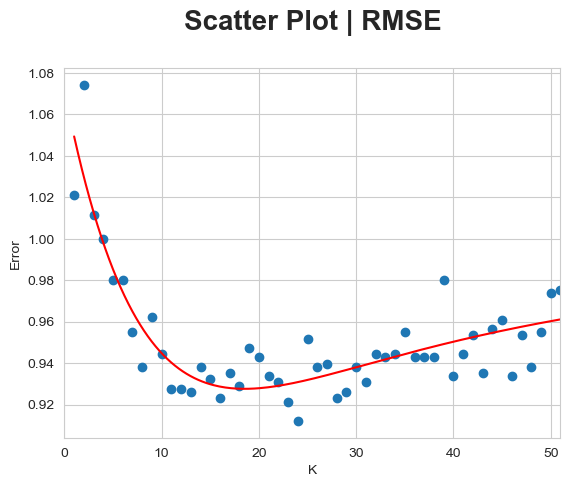

In [50]:
# Plotting the rmse values against k values
curve = pd.DataFrame({'K': K_s, 'RMSE': rmse_val}) # elbow curve

# Create the scatter plot with a curve of best fit
## Calculate polynomial
z = np.polyfit(K_s, rmse_val, 10)
f = np.poly1d(z)

## Calculate new x's and y's
x_new = np.linspace(1, 200, 1000)
y_new = f(x_new)

plt.plot(K_s, rmse_val,'o', x_new, y_new, 'red')
plt.xlim([0, 51])

# Add titles and labels
plt.title(
    'Scatter Plot | RMSE\n',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('K')
plt.ylabel('Error')

# Display the plot
plt.show()

In [41]:
k = 24

# Create and train k-nearest neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%.")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 60.97%.
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        26
           0       0.58      0.69      0.63       103
           1       0.49      0.27      0.34        75
           2       0.65      0.84      0.73       147

    accuracy                           0.61       351
   macro avg       0.43      0.45      0.43       351
weighted avg       0.55      0.61      0.57       351



In [42]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%.")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 63.53%.
Classification Report:
              precision    recall  f1-score   support

          -1       0.29      0.08      0.12        26
           0       0.64      0.68      0.66       103
           1       0.44      0.45      0.45        75
           2       0.74      0.80      0.77       147

    accuracy                           0.64       351
   macro avg       0.53      0.50      0.50       351
weighted avg       0.61      0.64      0.62       351



## Interpretation of Results
Our main objective was to compare the performance of two k-nearest neighborhood and two random forest models that classify whether a respondent has a mental health disorder based on their survey responses. One model ignored the time of survey, while the other model incorporated time of survey as one of the features.

Our analysis revealed that using k equals to 24, the accuracy of both k-nearest neighborhood models were identical (60.79%). This implies that the time of survey did not have any noticeable impact on the classification outcome. We can think of two possible reasons for this finding. One is that the time of survey is truly irrelevant to the other features and does not affect the probability of having a mental health disorder. The other is that there may be insufficient data to apply the k-nearest neighborhood model effectively, and that the accuracy score is not trustworthy.

However, when we examined the results of the random forest models, we observed that the inclusion of the time of survey slightly improved the accuracy of the classification process. When time of survey is excluded, both k-nearest neighbors and random forest result in equal accuracy, but when time is included, random forest models has a 2.56 increase in accuracy. This can be a sign of the subtle change in influence of other explanatory variables on whether a person has mental health disorder or other negative mental health issues.



### Chi-square test
To evaluate the effect of time of survey on the relative effects of other features and hence the outcome of the
classification model, we will perform the Chi-square test on the 'year of survey' variable and the dependent variable, to assess whether the distribution of the outcome variable differs significantly across different categories of this categorical variable.

In [59]:
# Perform Chi-Square test
chi2_result = pd.crosstab(Data_model['0'], Data_model['33'])
chi2_stat, p_value, dof, expected = chi2_contingency(chi2_result)

# Show results
print("Chi-Square Test Results:")
print("Chi-Square Statistic:", round(chi2_stat, 3))
print("P-Value:", round(p_value, 3), '<' if p_value < 0.001 else '>', 0.001)


Chi-Square Test Results:
Chi-Square Statistic: 140.18
P-Value: 0.0 < 0.001


Since the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis. The null hypothesis in this context states that there is no association between the 'year of survey' and the 'currently have health disorder' variables. However, the low p-value indicates that there is strong evidence to suggest that the two variables are significantly associated.

Thus, from the Chi-square test, we can reject the hypothesis that there exists no effect from time of survey on the
outcome the classification, or the change in the relative effects of other feature variables.

Therefore, we can conclude that there is a statistically significant relationship between the year of survey and the presence of health disorders among the respondents. The 'year of survey' seems to have an effect on the likelihood of respondents reporting health disorders.

## Suggestions and Recommendations
Based on our data analysis, we found that the time of survey did not have any significant effect on the prediction
 outcome of the k-nearest neighborhood models. Both models achieved the same accuracy, which could be interpreted in
 two ways. One possibility is that the time of survey is irrelevant to the other features and does not affect the probability of having a mental health disorder. Another possibility is that our dataset is too small or too homogeneous to apply the k-nearest neighborhood model effectively, and that the accuracy score is not a valid indicator of performance.

However, the random forest models showed that there was indeed an improvement on the classification when time of
survey is taken into account. This could either show the effect of time on the relative influence of other
variables on the current status of respondents' mental health, or this could simply be due to randomness.

We then conducted the Chi-square test to evaluate the significance of the effect of time of survey. The test
yielded a chi-square statistic of 140.18 and a p-value of 0.0 (less than 0.001). This finding highlights the importance of considering the 'year of survey' variable when studying the prevalence of health disorders in the population over time.

To further explore this issue, we recommend to conduct these following additional steps in our data analysis.
    1. To verify whether the time of survey is indeed irrelevant for the prediction of mental health disorder, we
    recommend conducting other statistical tests, such as the ANOVA, to measure the association
    between the time of survey and the other features. This will help us to determine if there is any hidden pattern or trend in the data that the k-nearest neighborhood model failed to capture.
    2. To improve the accuracy of the k-nearest neighborhood model, we recommend collecting more data from
    different sources and time periods.
    3. We can use other evaluation metrics besides accuracy, such as precision, recall, and F1-score, to assess the
performance of our models.
    4. Apart from the random forest model, we can use other machine learning algorithms, such as logistic regression
     or decision tree, to compare with our k-nearest neighborhood models.
